## Decision Tree Exercises and Testing

Import all the needed libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
iris_data = datasets.load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Importing the datasets iris_data and put it on a DataFrame, set class column with target value, and target column with the correspondend target name value

In [3]:
def get_names_target(value, iris):
    for i in range(len(iris['target_names'])):
        if value == i: return iris['target_names'][i]
df_iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df_iris['class'] = iris_data['target']
df_iris['target'] = df_iris['class'].apply(get_names_target, iris = iris)
df_iris.sample(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,target
128,6.4,2.8,5.6,2.1,2,virginica
142,5.8,2.7,5.1,1.9,2,virginica
134,6.1,2.6,5.6,1.4,2,virginica
5,5.4,3.9,1.7,0.4,0,setosa
144,6.7,3.3,5.7,2.5,2,virginica
99,5.7,2.8,4.1,1.3,1,versicolor
95,5.7,3.0,4.2,1.2,1,versicolor
81,5.5,2.4,3.7,1.0,1,versicolor
146,6.3,2.5,5.0,1.9,2,virginica
106,4.9,2.5,4.5,1.7,2,virginica


Define the X and Y values from the dataFrame

In [4]:
X = np.array(df_iris[['sepal length (cm)','sepal width (cm)']])
y = np.array(df_iris['class'])
X.shape, y.shape

((150, 2), (150,))

Using the train test split we split our data in Test and Train parameters

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

Import and define the Decision Tree from sklearn

In [6]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

Let's plot our tree

[Text(117.94090909090909, 209.07692307692307, 'X[0] <= 5.45\ngini = 0.666\nsamples = 100\nvalue = [34, 31, 35]'),
 Text(45.654545454545456, 192.35076923076923, 'X[1] <= 2.75\ngini = 0.164\nsamples = 34\nvalue = [31, 2, 1]'),
 Text(30.436363636363637, 175.62461538461537, 'X[0] <= 4.7\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 1]'),
 Text(15.218181818181819, 158.89846153846153, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(45.654545454545456, 158.89846153846153, 'X[0] <= 5.0\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(30.436363636363637, 142.1723076923077, 'X[1] <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(15.218181818181819, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(45.654545454545456, 125.44615384615385, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(60.872727272727275, 142.1723076923077, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(60.872727272727275, 175.62461538461537, 'gini = 0.0\nsamples = 30\nvalue = [

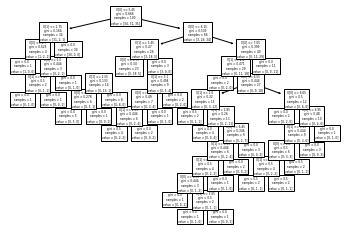

In [7]:
tree.plot_tree(clf)

Let's get our prediction

In [8]:
y_pred = clf.predict(X_test)

We do have analize the accurancy of our model trained right now.

In [9]:
import sklearn.metrics as skm
print("Confusion Matrix: \n", skm.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy: ", skm.accuracy_score(y_test, y_pred) * 100, "\n")
print("Report:\n", skm.classification_report(y_test,y_pred), "\n")

Confusion Matrix: 
 [[16  0  0]
 [ 1 13  5]
 [ 0  9  6]] 

Accuracy:  70.0 

Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.59      0.68      0.63        19
           2       0.55      0.40      0.46        15

    accuracy                           0.70        50
   macro avg       0.69      0.69      0.69        50
weighted avg       0.69      0.70      0.69        50
 



We've got a 70% accurancy on our trained model but let's test how we can improve 
our model to increase the accurancy. First thing when we initialize the Decision Tree
we can use the criterion to set how the decision tree is going to split our data. If we read 
the documentation on -> [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
we can find out under the parameters section on the voice criterion that we can set our criterion on 2 
different way {"gini", "entropy"}, by default it is setted to gini so we don't have to test it 
again, so let's find out what result we should have by using the "entropy"

In [10]:
clf_entropy = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
clf_entropy = clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)

Now let's find out the accurancy of our model and compare it with the previous on

In [11]:
print("Confusion Matrix: \n", skm.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy: ", skm.accuracy_score(y_test, y_pred) * 100, "\n")
print("Report:\n", skm.classification_report(y_test,y_pred), "\n")

Confusion Matrix: 
 [[16  0  0]
 [ 1 12  6]
 [ 0  9  6]] 

Accuracy:  68.0 

Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       0.57      0.63      0.60        19
           2       0.50      0.40      0.44        15

    accuracy                           0.68        50
   macro avg       0.67      0.68      0.67        50
weighted avg       0.67      0.68      0.67        50
 



As we can see we find out that our accurancy as slightly decreased to 68%,
so we to find another way to increase our accurancy, let's try by adding 2 more
features to our X

In [12]:
X = np.array(df_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df_iris['class'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)

#init the DecisionTree
clf_3 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf_3 = clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)


In [13]:
print("Confusion Matrix: \n", skm.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy: ", skm.accuracy_score(y_test, y_pred) * 100, "\n")
print("Report:\n", skm.classification_report(y_test,y_pred), "\n")

Confusion Matrix: 
 [[16  0  0]
 [ 0 18  1]
 [ 0  0 15]] 

Accuracy:  98.0 

Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50
 



Okayy, we have a super score here, by adding 2 more feature to our model, for
a grand total of 4 we have noticed that our accurancy is increased a lot to a super 98%.
But let's make a more generalized study over our data and let's try to compare those.

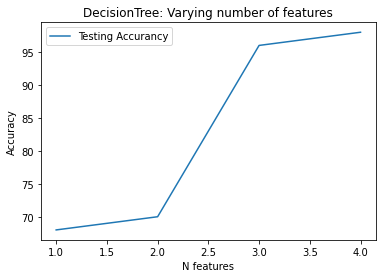

In [14]:
import matplotlib.pyplot as plt
n_features = np.arange(1,5)
accuracy = []
for i in range(1,5) :
    X = df_iris.iloc[:,0:i]
    y = df_iris.iloc[:,4]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
    clf_3 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
    clf_3 = clf_3.fit(X_train, y_train)
    y_pred = clf_3.predict(X_test)
    accuracy.append(skm.accuracy_score(y_test, y_pred) * 100)

plt.title('DecisionTree: Varying number of features')
plt.plot(n_features, accuracy, label = 'Testing Accurancy')
plt.legend()
plt.xlabel('N features')
plt.ylabel('Accuracy')
plt.show()


As we can see from our graph we can notice that the accurancy increase 
considerably from the third feature, and we can pick that instead of the all the four
because it is not worth it in efficiency term. Let's do the same with criterion = "entropy" and let's see
what do we get.


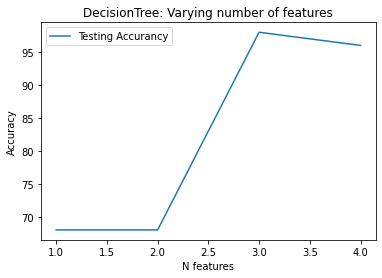

In [15]:
n_features = np.arange(1,5)
accuracy = []
for i in range(1,5) :
    X = df_iris.iloc[:,0:i]
    y = df_iris.iloc[:,4]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
    clf_3 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
    clf_3 = clf_3.fit(X_train, y_train)
    y_pred = clf_3.predict(X_test)
    accuracy.append(skm.accuracy_score(y_test, y_pred) * 100)

plt.title('DecisionTree: Varying number of features')
plt.plot(n_features, accuracy, label = 'Testing Accurancy')
plt.legend()
plt.xlabel('N features')
plt.ylabel('Accuracy')
plt.show()


From here we can see that we've got actually better results by just picking only 
the first 3 feautures. 

## Study with another Model
We are going to use the Zoo Dataset from [Datasets](https://archive.ics.uci.edu/ml/datasets/zoo)

In [16]:
animal = pd.read_csv('/work/Zoo_Dataset/zoo.csv')
ani_class = pd.read_csv('/work/Zoo_Dataset/class.csv')
animal.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [17]:
ani_class

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [18]:
animal.info(), animal.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


(None,
 animal_name    0
 hair           0
 feathers       0
 eggs           0
 milk           0
 airborne       0
 aquatic        0
 predator       0
 toothed        0
 backbone       0
 breathes       0
 venomous       0
 fins           0
 legs           0
 tail           0
 domestic       0
 catsize        0
 class_type     0
 dtype: int64)

We can see that there's no missing values

In [19]:
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


As we can see from the class_type colums we have 7 different classes each of them
rapresenting an animal.

In [20]:
df_animals = pd.merge(animal, ani_class, how='left', left_on='class_type', right_on='Class_Number')
df_animals.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


(array([41., 20.,  5., 13.,  4.,  8., 10.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

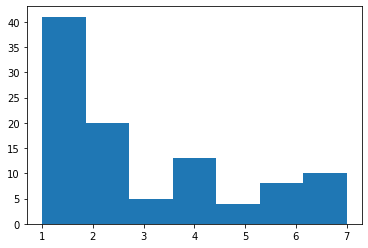

In [21]:
plt.hist(df_animals.class_type, bins=7)

<AxesSubplot:title={'center':'Correlation Heatmap'}>

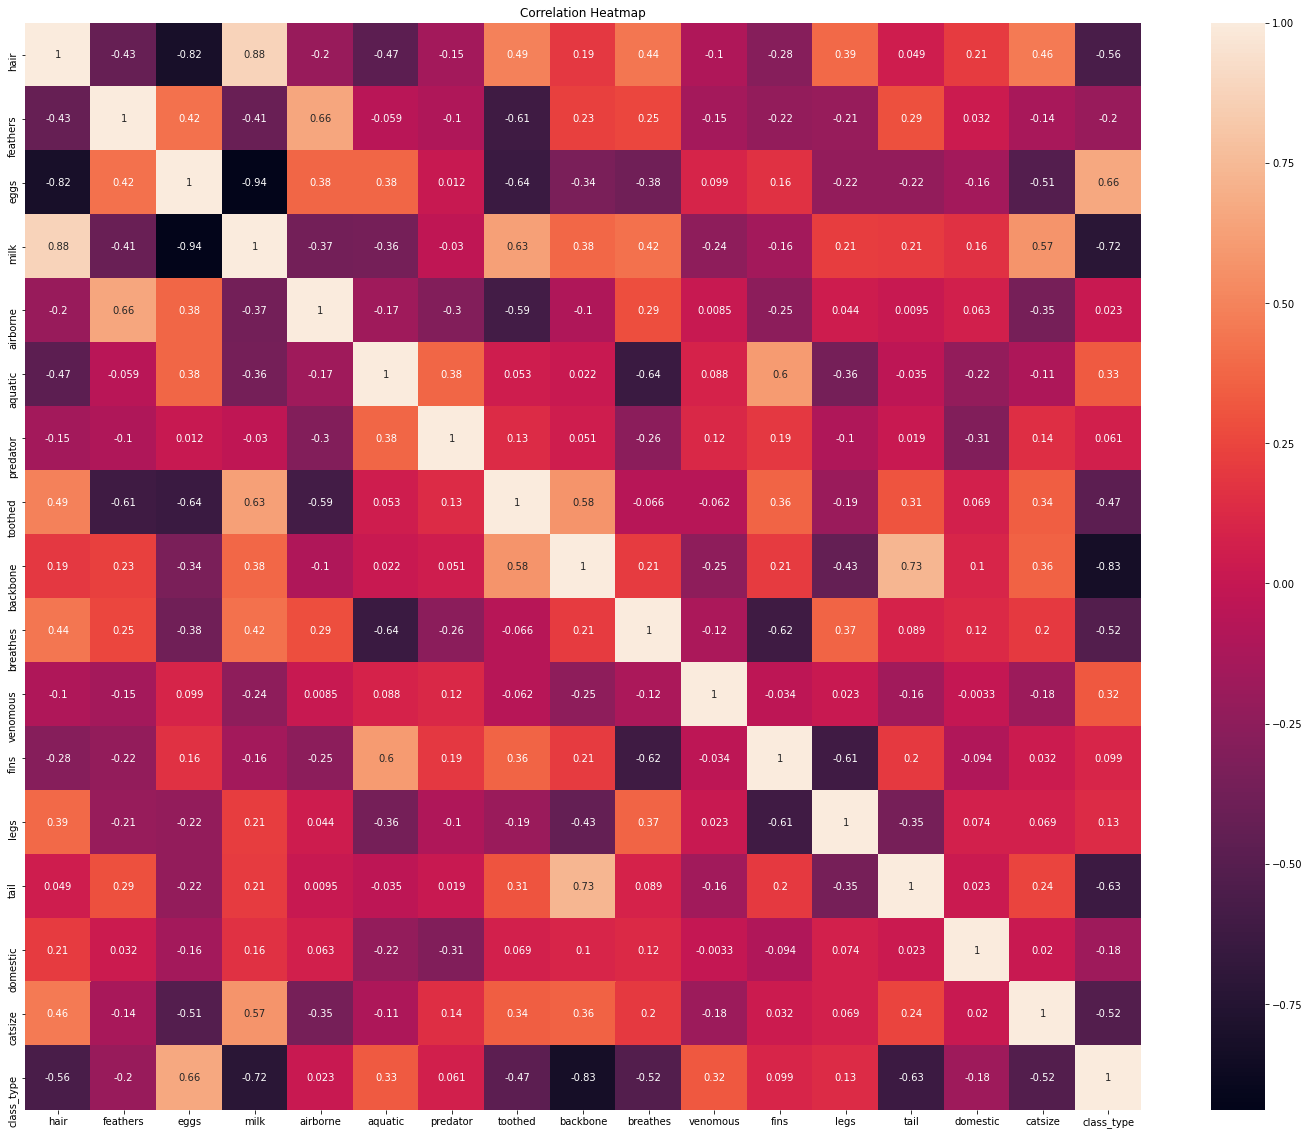

In [22]:
import seaborn as sns
plt.subplots(figsize=(25,20))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = animal.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [23]:
df_animals.groupby('Class_Type').mean()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
Class_Type,,,,,,,,,,,,,,,,,,,
Amphibian,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.750000,1.00000,1.0,1.0,0.250000,0.000000,4.000000,0.250000,0.000000,0.000000,5.0,5.0,4.0
Bird,0.00000,1.0,1.00000,0.0,0.80000,0.300000,0.450000,0.00000,1.0,1.0,0.000000,0.000000,2.000000,1.000000,0.150000,0.300000,2.0,2.0,20.0
Bug,0.50000,0.0,1.00000,0.0,0.75000,0.000000,0.125000,0.00000,0.0,1.0,0.250000,0.000000,6.000000,0.000000,0.125000,0.000000,6.0,6.0,8.0
Fish,0.00000,0.0,1.00000,0.0,0.00000,1.000000,0.692308,1.00000,1.0,0.0,0.076923,1.000000,0.000000,1.000000,0.076923,0.307692,4.0,4.0,13.0
Invertebrate,0.00000,0.0,0.90000,0.0,0.00000,0.600000,0.800000,0.00000,0.0,0.3,0.200000,0.000000,3.700000,0.100000,0.000000,0.100000,7.0,7.0,10.0
Mammal,0.95122,0.0,0.02439,1.0,0.04878,0.146341,0.536585,0.97561,1.0,1.0,0.000000,0.097561,3.365854,0.853659,0.195122,0.780488,1.0,1.0,41.0
Reptile,0.00000,0.0,0.80000,0.0,0.00000,0.200000,0.800000,0.80000,1.0,0.8,0.400000,0.000000,1.600000,1.000000,0.000000,0.200000,3.0,3.0,5.0


### Let's try to apply the Decision Tree
We start by splitting our data.

In [24]:
X = animal.iloc[:, 1:17].values
y = animal.iloc[:,17].values

We are gonna go directly to implement our algorithm to find out how the accurancy vary based on the number of the feature for both the criterion. 
Let's start from ***Criterion = 'entropy'***

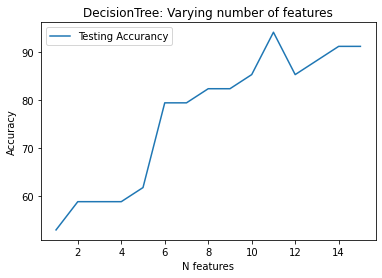

array([[[ 1.        , 52.94117647],
        [ 2.        , 58.82352941],
        [ 3.        , 58.82352941],
        [ 4.        , 58.82352941],
        [ 5.        , 61.76470588],
        [ 6.        , 79.41176471],
        [ 7.        , 79.41176471],
        [ 8.        , 82.35294118],
        [ 9.        , 82.35294118],
        [10.        , 85.29411765],
        [11.        , 94.11764706],
        [12.        , 85.29411765],
        [13.        , 88.23529412],
        [14.        , 91.17647059],
        [15.        , 91.17647059]]])

In [25]:
n_features = np.arange(1,16)
accuracy = []
for i in range(2,17) :
    X = animal.iloc[:, 1:i].values
    y = animal.iloc[:,17].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
    clf_3 = tree.DecisionTreeClassifier(criterion="entropy",random_state=0)
    clf_3 = clf_3.fit(X_train, y_train)
    y_pred = clf_3.predict(X_test)
    accuracy.append(skm.accuracy_score(y_test, y_pred) * 100)

plt.title('DecisionTree: Varying number of features')
plt.plot(n_features, accuracy, label = 'Testing Accurancy')
plt.legend()
plt.xlabel('N features')
plt.ylabel('Accuracy')
plt.show()
results = np.dstack((n_features, accuracy))
results

In [39]:
"The largest accurancy Rate is feature:", np.amax(results[:,:15])



('The largest accurancy Rate is :', 94.11764705882352)

### We are gonna do the same thing but now with another Criterion

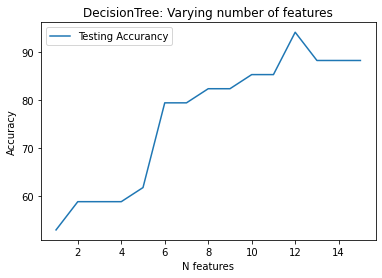

array([[[ 1.        , 52.94117647],
        [ 2.        , 58.82352941],
        [ 3.        , 58.82352941],
        [ 4.        , 58.82352941],
        [ 5.        , 61.76470588],
        [ 6.        , 79.41176471],
        [ 7.        , 79.41176471],
        [ 8.        , 82.35294118],
        [ 9.        , 82.35294118],
        [10.        , 85.29411765],
        [11.        , 85.29411765],
        [12.        , 94.11764706],
        [13.        , 88.23529412],
        [14.        , 88.23529412],
        [15.        , 88.23529412]]])

In [40]:
n_features = np.arange(1,16)
accuracy = []
for i in range(2,17) :
    X = animal.iloc[:, 1:i].values
    y = animal.iloc[:,17].values
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
    clf_3 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
    clf_3 = clf_3.fit(X_train, y_train)
    y_pred = clf_3.predict(X_test)
    accuracy.append(skm.accuracy_score(y_test, y_pred) * 100)

plt.title('DecisionTree: Varying number of features')
plt.plot(n_features, accuracy, label = 'Testing Accurancy')
plt.legend()
plt.xlabel('N features')
plt.ylabel('Accuracy')
plt.show()
results = np.dstack((n_features, accuracy))
results

In [41]:
"The largest accurancy Rate is with 12 features:", np.amax(results[:,:15])

('The largest accurancy Rate is :', 94.11764705882352)

So our model tell's us that the best accurancy that we can achieve is by selecting the first 12 features with a "gini" criterion
so let's get some more details.

In [44]:
X = animal.iloc[:, 1:13].values
y = animal.iloc[:,17].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0)
clf_3 = tree.DecisionTreeClassifier(criterion="gini",random_state=0)
clf_3 = clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)
print("Confusion Matrix: \n", skm.confusion_matrix(y_test, y_pred), "\n")
print("Accuracy: ", skm.accuracy_score(y_test, y_pred) * 100, "\n")
print("Report:\n", skm.classification_report(y_test,y_pred), "\n")
print("Number of leaves: ", clf_3.get_n_leaves(),"\n")
print("Depth of Decision Tree: ", clf_3.get_depth(),"\n")

Confusion Matrix: 
 [[12  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  3  0  1  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  2]] 

Accuracy:  94.11764705882352 

Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         6
           3       1.00      0.75      0.86         4
           4       1.00      1.00      1.00         7
           5       0.50      1.00      0.67         1
           6       1.00      0.50      0.67         2
           7       0.67      1.00      0.80         2

    accuracy                           0.94        34
   macro avg       0.88      0.89      0.86        34
weighted avg       0.97      0.94      0.94        34
 

Number of leaves:  8 

Depth of Decision Tree:  6 



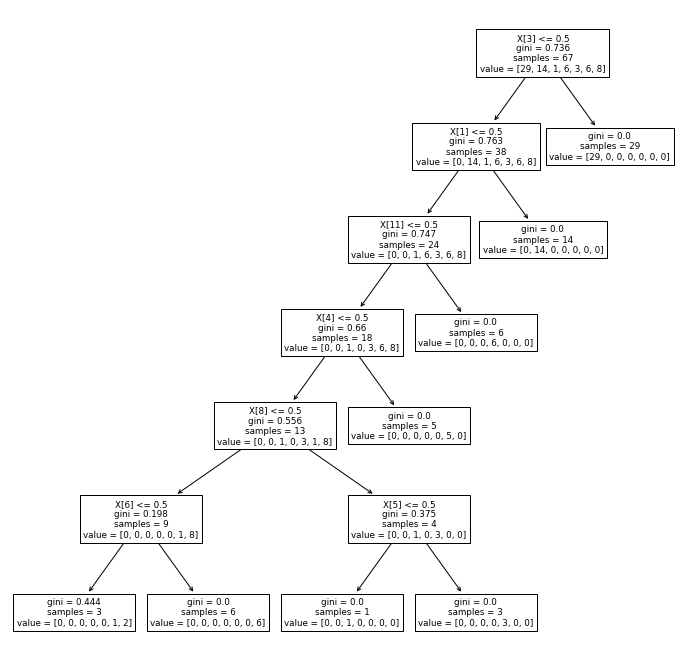

In [46]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf_3)
plt.show()